# Análisis de datos sobre el desgaste y desempeño de una muestra de empleados.

In [2]:
#Librerias necesarias:

%matplotlib inline

import matplotlib.pyplot as plt # para sacar graficos
import pandas as pd
import numpy as np # Calculos matematicos
import seaborn as sns #graficos
import statistics # estadisticas
import scipy.stats as stats # estadisticas

In [3]:
# creando data frame 

df = pd.read_csv("/Users/andresrsalamanca/Documents/GitHub/estadistica_edem/employee_attrition/HR_employee-attrition.csv")

Tabla de contenido:

1. [Objetivos](#objetivos)
2. [Materiales y metodologia](#materiales-y-metodologia)
3. [Analisis y Resultados](#analisis-y-resultados)
4. [Contrastes de hipótesis (T-test)](#contrastes-de-hipótesis-t-test)
5. [ANOVA](#anova)
6. [Conclusiones](#conclusiones)

#### <u>Objetivos</u>

Objetivo general:
Entender cuales son los principales factores que influyen en la tasa de deserción del talento humano dentro de las empresas.

Objetivo especifico:
Conocer cómo afecta la retención de personas dentro de las empresas en variables como edad,  vida y trabajo, nivel de educación y género. 

#### <u>Materiales y metodologia</u>

Para el estudio se tuvo en cuenta la muestra tomada por el area de HR en un total 1.470 personas de diferentes departamentos y genero. 

El dataset se descarga de Kaggle: https://www.kaggle.com/datasets/patelprashant/employee-attrition?resource=download 

#### Limpieza de datos:
El dataset no traia datos faltantes o caracteres especiales que requirieran correcciones.

In [4]:
# Limpieza de datos 
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values, data_types

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

#### <u>Analisis y resultados</u>

El éxito de cualquier organización radica fundamentalmente en su capacidad para atraer y retener talento humano. En este contexto, el objetivo de este estudio es identificar los factores que contribuyen a la retención del talento humano en una empresa y explorar los posibles elementos que podrían causar desgaste en los empleados, llevándolos a buscar oportunidades fuera de la organización.

El dataset para este análisis consta de 35 columnas y 1,470 registros. Sin embargo, para los fines de este estudio, nos centraremos principalmente en dos variables:

- Edad (Age): Variable cuantitativa.
- Atrittion (tasa de desercion)

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

En la muestra encontramos algunos datos cuantitativos relevantes:

1. Edad prom media: 36.9
2. Años prom en la compañia: 7
3. Años prom. en el mismo rol: 4.2
4. Años prom. desde la ultima promocion: 2.1


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


En la muestra se presentan las siguientes profesiones :

1. Life Sciences
2. Medical	
3. Marketing
4. Technical Degree
5. Other
6. Human Resources


Life Sciences y Medical ocupan el 72.8% de la muestra.

Ahora entendamos su distribucion:

In [7]:
pd.crosstab(index=df['EducationField'], columns='count').sort_values(by='count', ascending=False)

col_0,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


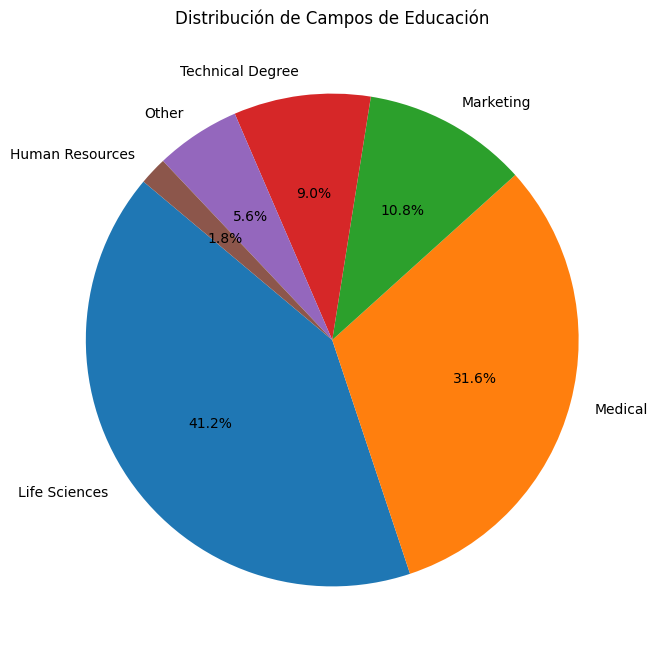

In [8]:
cross_tab = pd.crosstab(index=df['EducationField'], columns='count').sort_values(by='count', ascending=False)
# Graficar el gráfico circular
plt.figure(figsize=(8, 8))  # Puedes ajustar el tamaño según tus necesidades
plt.pie(cross_tab['count'], labels=cross_tab.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Campos de Educación')
plt.show()

Respecto al genero en la muestra de estudio se detalla la siguiente distribucion:

Es importante resaltar que de la totalidad de encuestados el 10% de los hombres y el 5.9% de las mujeres presentan un desgaste en la posición actual que ocupan en la compañía.

In [9]:

attrition_gender_grouped = df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count')
total_count = attrition_gender_grouped['Count'].sum()
attrition_gender_grouped['Percentage'] = (attrition_gender_grouped['Count'] / total_count) * 100

attrition_gender_grouped 



,Attrition,Gender,Count,Percentage
0,No,Female,501,34.081633
1,No,Male,732,49.795918
2,Yes,Female,87,5.918367
3,Yes,Male,150,10.204082


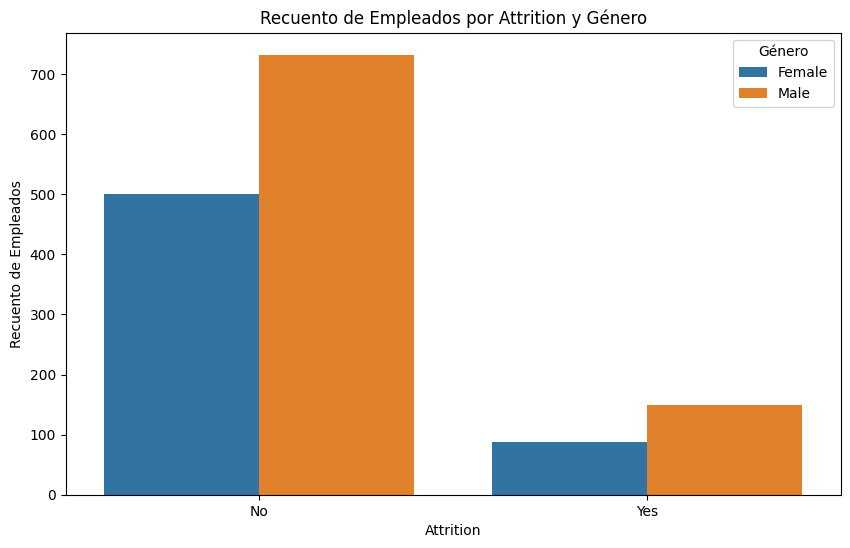

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='Count', hue='Gender', data=attrition_gender_grouped)

plt.title('Recuento de Empleados por Attrition y Género')
plt.xlabel('Attrition')
plt.ylabel('Recuento de Empleados')
plt.legend(title='Género')
plt.show()

El porcentaje de empleados que respondieron "SI" en la encuesta sobre estar "desgastados"('Attrition') en sus posición actual, divididos por campo de educación ('EducationField') es el siguiente:

- Human Resources: 25.93%
- Life Sciences: 14.69%
- Marketing: 22.01%
- Medical: 13.58%
- Other: 13.41%
- Technical Degree: 24.24%

Como se puede ver en la grafica; los campos de 'Human Resources' y 'Technical Degree' tienen los porcentajes más altos de "desgaste", mientras que 'Medical' y 'Other' tienen los más bajos.

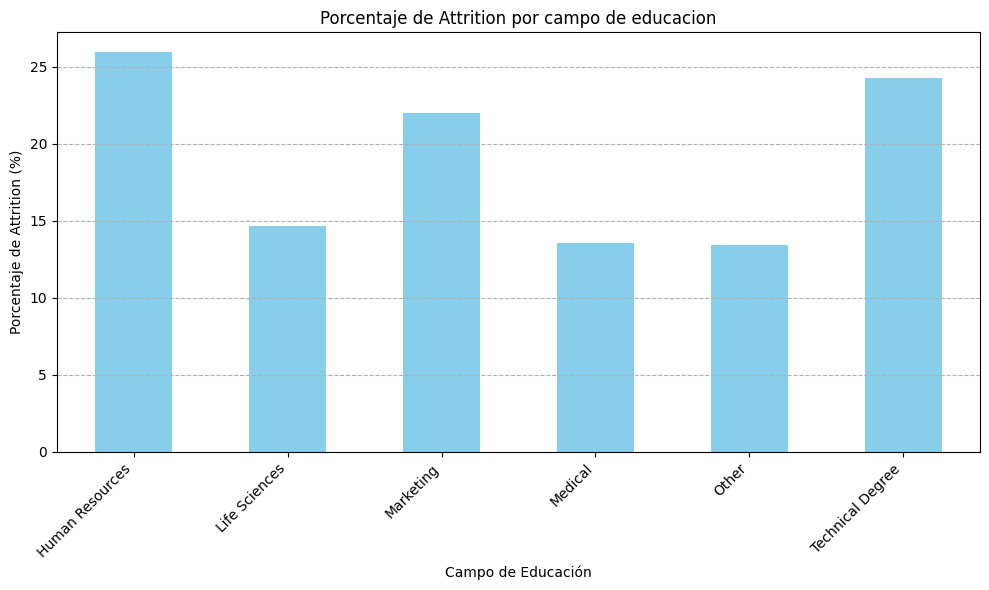

In [11]:
attrition_rate_by_education_field = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack() * 100

# Filtrar solo los valores de 'Yes' para 'Attrition'
attrition_rate = attrition_rate_by_education_field['Yes']

attrition_rate

plt.figure(figsize=(10, 6))
attrition_rate.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Attrition por campo de educacion')
plt.xlabel('Campo de Educación')
plt.ylabel('Porcentaje de Attrition (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#### Contrastes de hipótesis (T-test)

La edad promedio y la desviación estándar de los empleados que respondieron "SI" y "NO"  que sufren algun "desgaste" ('Attrition') laboral son los siguientes:

- Para los empleados que respondieron: ('No'):
Edad promedio: 37.56 años
Desviación estándar: 8.89 años
- Para los empleados que respondieron: ('Yes'):
Edad promedio: 33.61 años
Desviación estándar: 9.69 años.

Esto sugiere que, en promedio, los empleados que tiene un mayor desgaste en la empresa tienden a ser más jóvenes que aquellos que no. Este análisis podría ser útil para desarrollar estrategias de retención enfocadas en grupos de edad más susceptibles a la deserción.

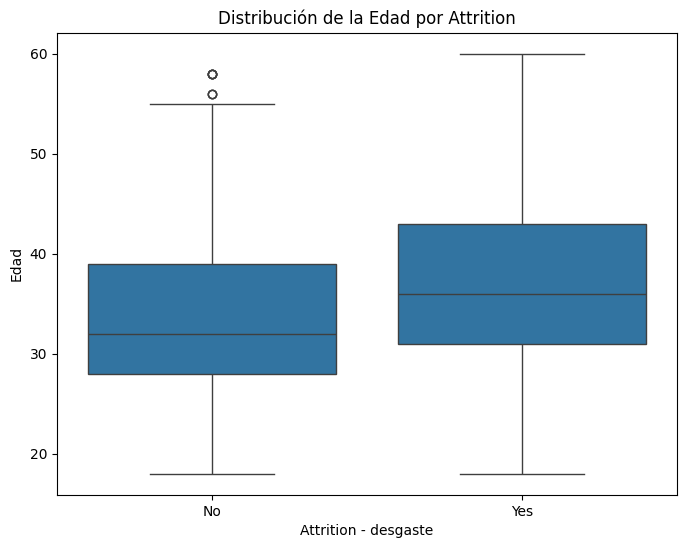

In [24]:
# Gráfico de cajas para comparar la distribución de la edad por 'Attrition'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Distribución de la Edad por Attrition')
plt.xlabel('Attrition - desgaste')
plt.ylabel('Edad')
plt.xticks([0, 1], ['No', 'Yes'])  # Asegurarse de que las etiquetas son correctas

# Mostrar la gráfica
plt.show()

El T-test nos ayudará a determinar si hay diferencias estadísticamente significativas en la media de edades entre los dos grupos de Attrition. Si el valor p obtenido del Test es menor que el nivel de significancia (0.05), podemos concluir que las diferencias en las medias de edad entre los grupos son significativas.

El análisis realizado para examinar las diferencias en la edad  entre los grupos definidos por Attrition ha resultado en:

Estadístico F: 38.18
Valor p: 0.0000836


H0 = La media de edad de los empleados que  sufren desgaste  (Attrition = Yes) es IGUAL a la media de edad de los empleados que no lo padecen.

Ha= Existe al menos una diferencia significativa entre las medias de edad de la muestra entre los empleados que sufren desgaste laboral (attrition).

Una vez realizado el Test arroja que hay evidencia muy fuerte para afirmar que existen diferencias significativas en la edad media entre los empleados que sufren desgaste laboral y los que no; y que estas diferencias no se deben al azar.

####  <u>ANOVA</u>

En el grafico vemos distribución del "DailyRate" (pago diario) por "JobRole" entre los empleados que han respondido "Yes" a Attrition. A partir del  grafico se puede visualizar la mediana, los cuartiles y los valores atípicos para el "DailyRate" en cada uno de los roles de trabajo, lo que facilita la comparación entre grupos.

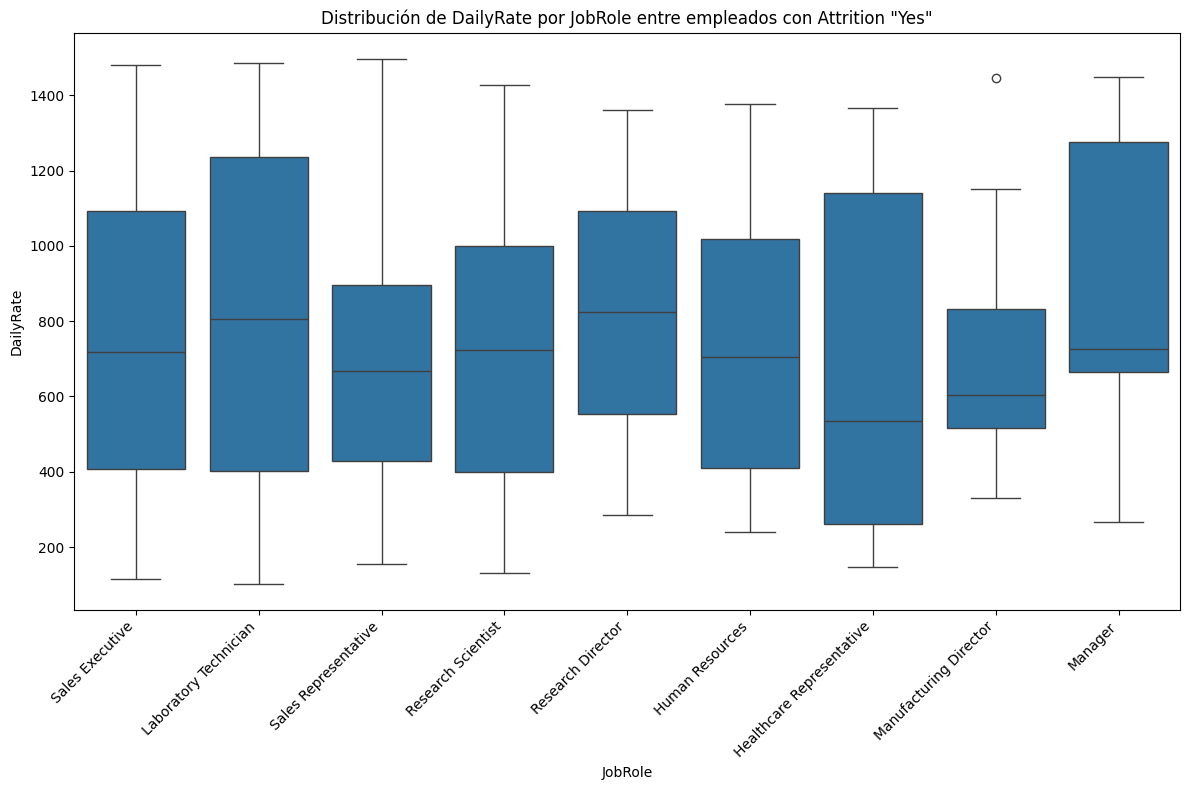

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño de la figura para una mejor visualización
plt.figure(figsize=(12, 8))

# Creación del gráfico de cajas
sns.boxplot(x='JobRole', y='DailyRate', data=attrition_yes)

# Mejora en la presentación del gráfico
plt.xticks(rotation=45, ha="right")  # Rotación de las etiquetas del eje X para mejor visualización
plt.title('Distribución de DailyRate por JobRole entre empleados con Attrition "Yes"')
plt.xlabel('JobRole')
plt.ylabel('DailyRate')

# Mostramos el gráfico
plt.tight_layout()
plt.show()


In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Filtrando el DataFrame para incluir solo a los empleados con Attrition "Yes"
attrition_yes = df[df['Attrition'] == 'Yes']

anova_model_attrition_yes_dailyrate_jobrole = ols('DailyRate ~ C(JobRole)', data=attrition_yes).fit()

# Realizamos la prueba ANOVA
anova_table_attrition_yes_dailyrate_jobrole = sm.stats.anova_lm(anova_model_attrition_yes_dailyrate_jobrole, typ=2)

anova_table_attrition_yes_dailyrate_jobrole

,sum_sq,df,F,PR(>F)
C(JobRole),4.640033e+05,8.0,0.351186,0.944632
Residual,3.765548e+07,228.0,NaN,NaN


El análisis ANOVA realizado para comparar el "DailyRate" (pago diario) según el "JobRole" dentro del grupo de empleados que respondieron "Yes" a Attrition ha dado los siguientes resultados:

1. df (grados de libertad) para "JobRole" es 8, indicando el número de categorías comparadas.
2. F (estadístico F) es 0.351186, lo cual es el valor calculado utilizado para determinar si las medias entre los grupos son estadísticamente diferentes.
3. PR(>F), el p-valor, es 0.944632, indicando la probabilidad de observar estos resultados si no hubiera diferencias reales entre los grupos.

Dado que el p-valor es mayor que 0.05, no hay evidencia estadísticamente significativa para rechazar la hipótesis nula. Esto sugiere que no hay diferencias significativas en el "DailyRate" entre los diferentes "JobRole" dentro del grupo de empleados que han respondido "Yes" a Attrition. Esto significa que, basándonosen la muestra de empleados, el "DailyRate" no parece variar significativamente en función del rol de trabajo entre los empleados que estan sufriendo algun tipo de desgaste "attrition" dentro de la compañia.

#### <u>Conclusiones:<u/>

Este estudio estadístico ha revelado varias dimensiones clave en relación con la gestión del talento humano y la retención de empleados en la organización. Al considerar la edad y los años de permanencia en la empresa, encontramos que el perfil promedio de un empleado es de 36.9 años de edad, con 7 años de servicio en la compañía, 4.2 años en el mismo rol y 2.1 años desde la última promoción. Estos datos subrayan una fuerza laboral con una mezcla equilibrada de estabilidad y experiencia.

Al analizar más a fondo la relación entre la edad y el desgaste laboral (attrition), se descubrió que los empleados más jóvenes tienden a experimentar mayores niveles de desgaste. Con una edad promedio de 33.61 años entre los empleados que reportan un mayor desgaste, en comparación con 37.56 años entre aquellos que no lo hacen, se destaca la necesidad de estrategias de retención específicamente dirigidas a los empleados más jóvenes.

Además, un análisis ANOVA se centró en comparar el pago diario (DailyRate) según el rol laboral (JobRole) entre los empleados que experimentan desgaste. A pesar de las diferencias en las categorías de roles laborales (reflejadas en 8 grados de libertad), el estadístico F de 0.351186 y un p-valor de 0.944632 sugieren que no existen diferencias significativas en el pago diario entre estos roles dentro del grupo de empleados afectados por el desgaste. Esto indica que, desde la perspectiva de la remuneración diaria, no hay una variabilidad sustancial que pueda estar contribuyendo al desgaste laboral en diferentes roles.

En conjunto, estos hallazgos proporcionan una comprensión integral de algunos de los factores clave que influyen en la retención del talento. Mientras que la edad y el tiempo en el cargo son indicadores significativos de la lealtad y satisfacción de los empleados, el pago no parece diferir sustancialmente entre los roles en aquellos que experimentan desgaste laboral. Estos insights son cruciales para formular estrategias efectivas de gestión del talento, con un enfoque particular en abordar las necesidades de los empleados más jóvenes y en garantizar una estructura de remuneración equitativa en todos los roles para mitigar el desgaste laboral.